In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
import operator as op

In [2]:
#Leeemos la imagen
plt.rcParams['image.cmap'] = 'gray'
fourier = io.imread('images/fourier_bw512.bmp') #Imagen de Fourier
saturno = io.imread('images/saturn_bw.tif')

#Funcion para plotear de volon pimpon
def plot(objeto,n,title,mag):
    #plt.subplot(1,3,n)
    if mag == 1:
        plt.subplot(1,3,n)
        plt.imshow(objeto)
        plt.title(title)
        plt.tight_layout()
    else:
        plt.subplot(1,3,n)
        plt.imshow(objeto,vmin=0,vmax=255)
        plt.title(title)
        plt.tight_layout()
    



In [3]:
#Ejercicio 1

Tf = np.fft.fft2(fourier) #Discreta
sTf= np.fft.fftshift(Tf)

def magnitud(img):
    parte_realTf = abs(img) #Magnitud
    #parte_realTf = np.exp(1j*parte_realTf)
    return parte_realTf

def fase(img):
    fase_Tf= np.angle(img) #Fase
    return fase_Tf

def amplitud(img):
    amplitud_Tf= np.log(1+img)
    return amplitud_Tf

def i_amp(img):
    IAmplitud = np.fft.ifft2(img)
    IAmplitud = abs(IAmplitud)
    return IAmplitud

def i_fase(img):    
    IFase = np.fft.ifft2(np.exp(1j*img))
    IFase = abs(IFase)
    return IFase

In [4]:
faseF = fase(Tf)
sfaseF = fase(sTf)
#-------
magF = magnitud(Tf)
smagF = magnitud(sTf)
#-------
ampF = amplitud(magF)
sampF = amplitud(smagF)
#-------
iAmpF = i_amp(Tf)
siAmpF = i_amp(sTf)
#-------
iFasF = i_fase(faseF)
siFasF = i_fase(sfaseF)

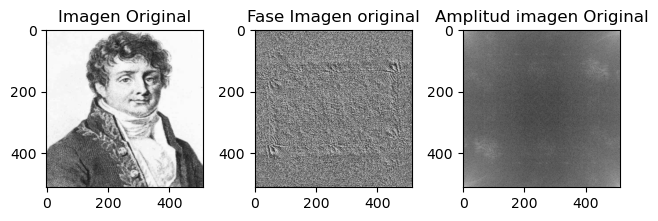

In [5]:
#Platemos Fourier sin corrimiento

plot(fourier,1,"Imagen Original",1)
plot(faseF,2,"Fase Imagen original",1)
plot(ampF,3,"Amplitud imagen Original",1)
plt.tight_layout()

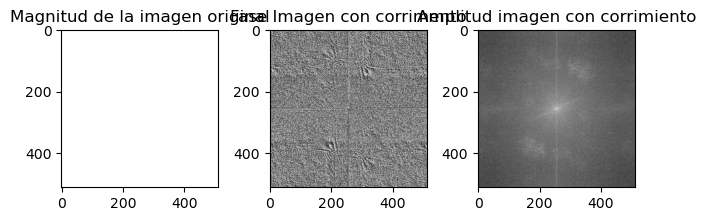

In [6]:
#Ploteamos Fourier con corrimiento
plot(magF,1,"Magnitud de la imagen original",2)
plot(sfaseF,2,"Fase Imagen con corrimento",1)
plot(sampF,3,"Amplitud imagen con corrimiento",1)

plt.tight_layout()

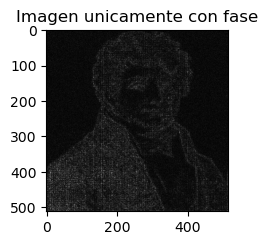

In [7]:
plot(iFasF,1,"Imagen unicamente con fase",1)

In [8]:
# Ejercicio 2
def butterworth(img,Dx,n,filtro):
    c,r = img.shape
    u = np.arange(r)
    v = np.arange(c)
    u,v = np.meshgrid(u,v) # matriz de u y v
    forma = np.sqrt((u- (r/2))**2+ (v- (c/2))**2)
    d = (1.0 + (forma/Dx)**(2*n))
    tras_Fourier = np.fft.fftshift(np.fft.fft2(img)) #Fourier
    con_filtro = op.mul(tras_Fourier,filtro(d))
    Icon_filtro = np.fft.ifft2(np.fft.ifftshift(con_filtro)).real #Fourier a la inversa
    return Icon_filtro

# Filtro paso bajas
def paso_bajas(d):
    filtro = 1.0/d
    return filtro

# Filtro paso altas
def paso_altas(d):
    filtro = 1-(1.0/d)
    return filtro


#Ruido sal y pimienta
def rSalPim(imagen):
    s= imagen.copy()/255
    y, x= imagen.shape
    pimienta=0.05
    sal= 1- pimienta
    for ren in range(y):
        for col in range(x):
            rnd= np.random.random()
            if rnd < pimienta:
                s[ren][col]=0
            elif rnd > sal:
                s[ren][col]=1
    return s
    

In [9]:
saturn_syp = rSalPim(saturno) 

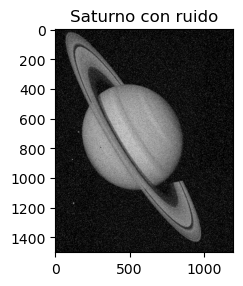

In [10]:
plot(saturn_syp,1,"Saturno con ruido",1)

In [11]:
# Imagen sin ruido

btw_bajas1 = butterworth(saturno,10,2,paso_bajas)
btw_bajas2 = butterworth(saturno,20,2,paso_bajas)
btw_bajas3 = butterworth(saturno,30,2,paso_bajas)

btw_altas1 = butterworth(saturno,10,2,paso_altas)
btw_altas2 = butterworth(saturno,20,2,paso_altas)
btw_altas3 = butterworth(saturno,30,2,paso_altas)

# Imagen con ruido
rbtw_bajas1 = butterworth(saturn_syp,10,2,paso_bajas)
rbtw_bajas2 = butterworth(saturn_syp,20,2,paso_bajas)
rbtw_bajas3 = butterworth(saturn_syp,30,2,paso_bajas)


rbtw_altas1 = butterworth(saturn_syp,10,2,paso_altas)
rbtw_altas2 = butterworth(saturn_syp,20,2,paso_altas)
rbtw_altas3 = butterworth(saturn_syp,30,2,paso_altas)

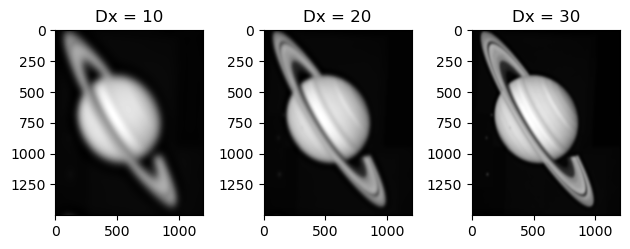

In [12]:
#Paso Bajas
plot(btw_bajas1,1,"Dx = 10",1)
plot(btw_bajas2,2,"Dx = 20",1)
plot(btw_bajas3,3,"Dx = 30",1)
plt.tight_layout()



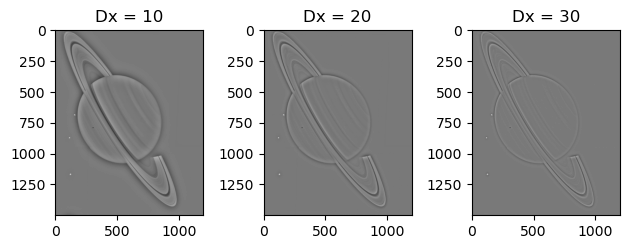

In [13]:
#Paso Altas
plot(btw_altas1,1,"Dx = 10",1)
plot(btw_altas2,2,"Dx = 20",1)
plot(btw_altas3,3,"Dx = 30",1)
plt.tight_layout()

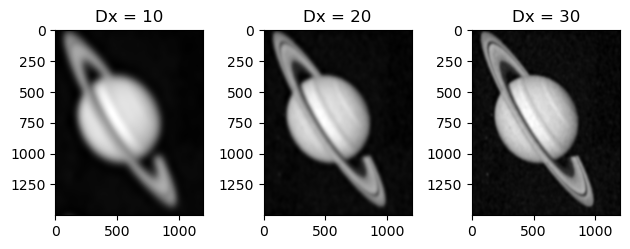

In [14]:
#Paso bajas con ruido
plot(rbtw_bajas1,1,"Dx = 10",1)
plot(rbtw_bajas2,2,"Dx = 20",1)
plot(rbtw_bajas3,3,"Dx = 30",1)
plt.tight_layout()

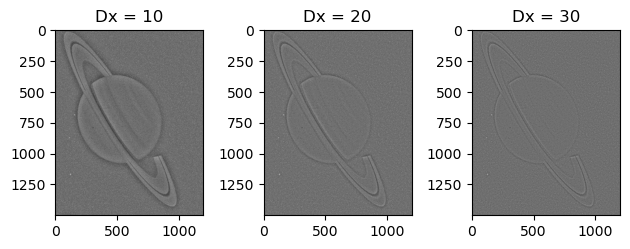

In [15]:
#Paso altas con ruido
plot(rbtw_altas1,1,"Dx = 10",1)
plot(rbtw_altas2,2,"Dx = 20",1)
plot(rbtw_altas3,3,"Dx = 30",1)
plt.tight_layout()